In [1]:
%pylab inline
from wallet.util.analysis import Analysis
domestic = ['SCHK','SCHD','SCHG','SCHV','SCHM','SCHB','SCHX','SCHA']
ana = Analysis(domestic + ['SCHF','SCHC','SCHE','SCHH','SCHQ','SCHP'] + ['EFG','EDV','ICVT','IGLB'], 50, 5)
print(ana)
stats0 = ana.screen(std_skew=False)
stats0

Populating the interactive namespace from numpy and matplotlib
from 2019-11-12 to 2020-01-31 - 18 symbols


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
ICVT,50.0,0.149605,0.166257,-0.239624,0.060376,0.155414,0.269983,0.389914,0.852109,7.712600,1.591664,-0.512414
IGLB,50.0,0.111800,0.126227,-0.107575,0.002983,0.121281,0.189355,0.358783,0.822833,6.922582,1.263272,-0.025229
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SCHP,50.0,0.049198,0.069509,-0.070279,-0.009712,0.049266,0.100408,0.190537,0.593612,3.191107,0.664919,0.373349
SCHX,50.0,0.107916,0.211844,-0.490507,0.017158,0.168554,0.250104,0.382839,0.471951,4.864689,2.976416,-1.115132
SCHK,50.0,0.106972,0.212718,-0.504459,0.024156,0.164476,0.245850,0.394971,0.465573,4.819269,3.006128,-1.127833
SCHB,50.0,0.103690,0.215814,-0.500948,0.029899,0.168539,0.254240,0.395579,0.443686,4.551779,3.115541,-1.089520
EDV,50.0,0.154002,0.385089,-0.616783,-0.151208,0.130515,0.404187,1.195659,0.379303,10.869084,5.014616,0.367935
SCHQ,50.0,0.109200,0.275309,-0.455371,-0.100518,0.113719,0.277323,0.856797,0.367817,7.746760,3.683235,0.399222


In [ ]:
########################################

In [2]:
ana.setup_mask({*domestic} & {*stats0.index})
ana.optimize_iteration([100], max_count=2)

([(0.1895, {'SCHD': 1}),
  (0.4437, {'SCHB': 1}),
  (0.4656, {'SCHK': 1}),
  (0.472, {'SCHX': 1}),
  (0.7212, {'SCHG': 1})],
 [])

In [3]:
this = 'SCHG'
ana.setup_mask({*domestic} & {*stats0.index})
s = ana.data.rolling(5).mean().pct_change().corr().loc[this].sort_values()
print(s[s < .8])
stats0.loc[[this,*s[s < .8].index]]

Symbols
SCHA    0.752645
SCHD    0.764553
SCHV    0.793659
Name: SCHG, dtype: float64


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568
SCHD,50.0,0.052395,0.234641,-0.666620,-0.077290,0.102921,0.230795,0.409011,0.189473,1.245402,4.014840,-0.941762
SCHV,50.0,0.046882,0.226521,-0.549812,-0.064398,0.118066,0.190606,0.410768,0.171927,1.156140,3.883334,-0.904515


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
Portfolio,50.0,0.136086,0.225344,-0.502276,0.009805,0.198232,0.290319,0.433741,0.568683,6.476329,2.852800,-1.044490
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568


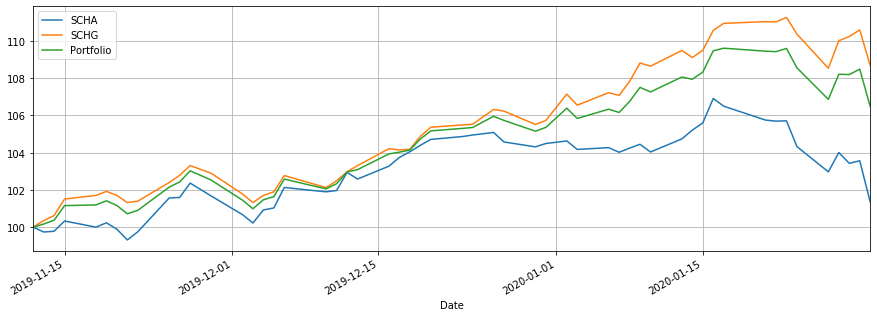

In [4]:
that = 'SCHA'
a,b = .7,.3
ana.graph({this:a,that:b})

In [ ]:
########################################

In [5]:
ana.setup_mask(['SCHF','SCHC','SCHE'])
ana.optimize_iteration([100], max_count=2)

([(0.0965, {'SCHF': 1}),
  (0.1017, {'SCHF': 0.3818, 'SCHE': 0.6182}),
  (0.1668, {'SCHC': 1})],
 [(0, 0, [[{'SCHF': 38, 'SCHE': 62}, set()]])])

In [6]:
ana.setup_mask(['SCHF','SCHC','SCHE'])
s = ana.data.rolling(5).mean().pct_change().corr().loc['SCHC'].sort_values()
print(s[s < .8])
stats0.loc[['SCHC',*s[s < .8].index]]

Series([], Name: SCHC, dtype: float64)


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHC,50.0,0.051077,0.258578,-0.673281,-0.05072,0.073528,0.249772,0.536883,0.166838,1.445091,4.813754,-0.923111


In [ ]:
########################################

{'SCHG': 28, 'SCHA': 12, 'EFG': 20, 'EDV': 20, 'SCHP': 10, 'ICVT': 5, 'IGLB': 5}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.116131,0.121559,-0.204353,0.041579,0.118255,0.212716,0.320731,0.890057,6.283176,1.434273,-0.508065
ICVT,50.0,0.149605,0.166257,-0.239624,0.060376,0.155414,0.269983,0.389914,0.852109,7.712600,1.591664,-0.512414
IGLB,50.0,0.111800,0.126227,-0.107575,0.002983,0.121281,0.189355,0.358783,0.822833,6.922582,1.263272,-0.025229
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SCHP,50.0,0.049198,0.069509,-0.070279,-0.009712,0.049266,0.100408,0.190537,0.593612,3.191107,0.664919,0.373349
EDV,50.0,0.154002,0.385089,-0.616783,-0.151208,0.130515,0.404187,1.195659,0.379303,10.869084,5.014616,0.367935
EFG,50.0,0.063259,0.219611,-0.589659,-0.027306,0.111796,0.189882,0.476036,0.251911,2.339792,3.722508,-1.047107
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568


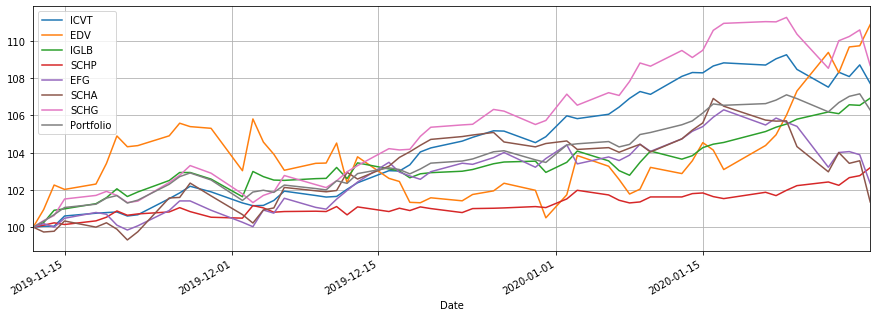

In [7]:
x = 40
ratio = {this:int(round(x*a)),that:int(round(x*b)),
         'EFG':20,'EDV':20,'SCHP':10,'ICVT':5,'IGLB':5}
print(ratio)
ana.graph(ratio)